# ANOVA 실습

In [1]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd


In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/sewonghwang/golf-ball-testing
df = pd.read_csv("datasets/Golf_test.csv")

# 데이터 샘플 확인
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [3]:
# stats 패키지로 ANOVA 검정

F_statistic, p = stats.f_oneway(df['TypeA_before'],
                                df['TypeB_before'],
                                df['TypeC_before'])
print('일원분산분석 결과: F=',F_statistic,'p=',p)

# 정규성 검정과 등분산 검정은 t_test에서 진행함
# stats에서 아노바 수행, 3개 변수 간 평균 차이가 통계적으로 유의한지 확인한다.
# p value가 0.016이므로 3개 변수 중 최소한 하나의 변수 조합 간에는 차이가 있을을 알 수 있다. 


일원분산분석 결과: F= 4.22016943303009 p= 0.01651542019190324


In [5]:
# ols패키지 ANOVA 검정을 위한 데이터 재구조화

df2 = pd.melt(df)
df2 = df2[df2['variable'].isin(['TypeA_before','TypeB_before','TypeC_before'])]

df2.head()

# ols패키지의 ANOVA 검정을 하기 위해 재구조화를 한다. 기존에는 각 골프공 조건이 개별 칼럽으로 구성되어 있어서 melt 함수를 사용하여 구분자인 variable 칼럼과 실제 값이 담긴 value칼럼으로 재구조화. 3개의 컬럼만 선택함. 

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


In [6]:
# ols 패키지로 ANOVA 검정

model = ols('value ~C(variable)',df2).fit()
print(anova_lm(model))

# stats패키지와 동일한 변수로 아노바 검정을 했으므로 결과값도 동일하게 산출된다. 

                df        sum_sq     mean_sq         F    PR(>F)
C(variable)    2.0    675.453333  337.726667  4.220169  0.016515
Residual     147.0  11763.940000   80.026803       NaN       NaN


In [9]:
# 사후검정 수행

posthoc = pairwise_tukeyhsd(df2['value'],
                            df2['variable'],
                            alpha=0.05)
print(posthoc)
# 터키의 HSD 사후검정으로 어떠한 골프공 간의 유의미한 차이가 있는지 확인. 
# A와 B간에만 유의미한 차이가 있다. 


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
TypeA_before TypeB_before     5.14 0.0129  0.9038 9.3762   True
TypeA_before TypeC_before      1.9 0.5392 -2.3362 6.1362  False
TypeB_before TypeC_before    -3.24 0.1696 -7.4762 0.9962  False
---------------------------------------------------------------


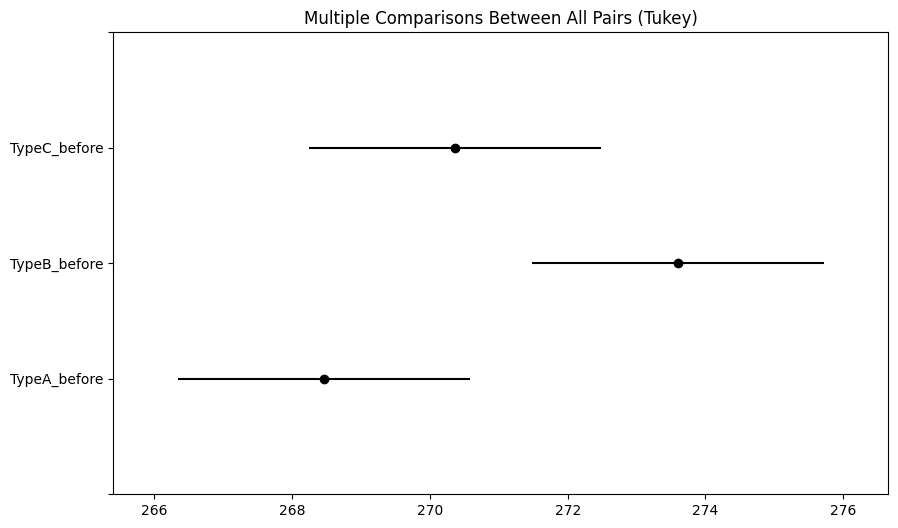

In [8]:
fig = posthoc.plot_simultaneous()